In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.shape

(768, 9)

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

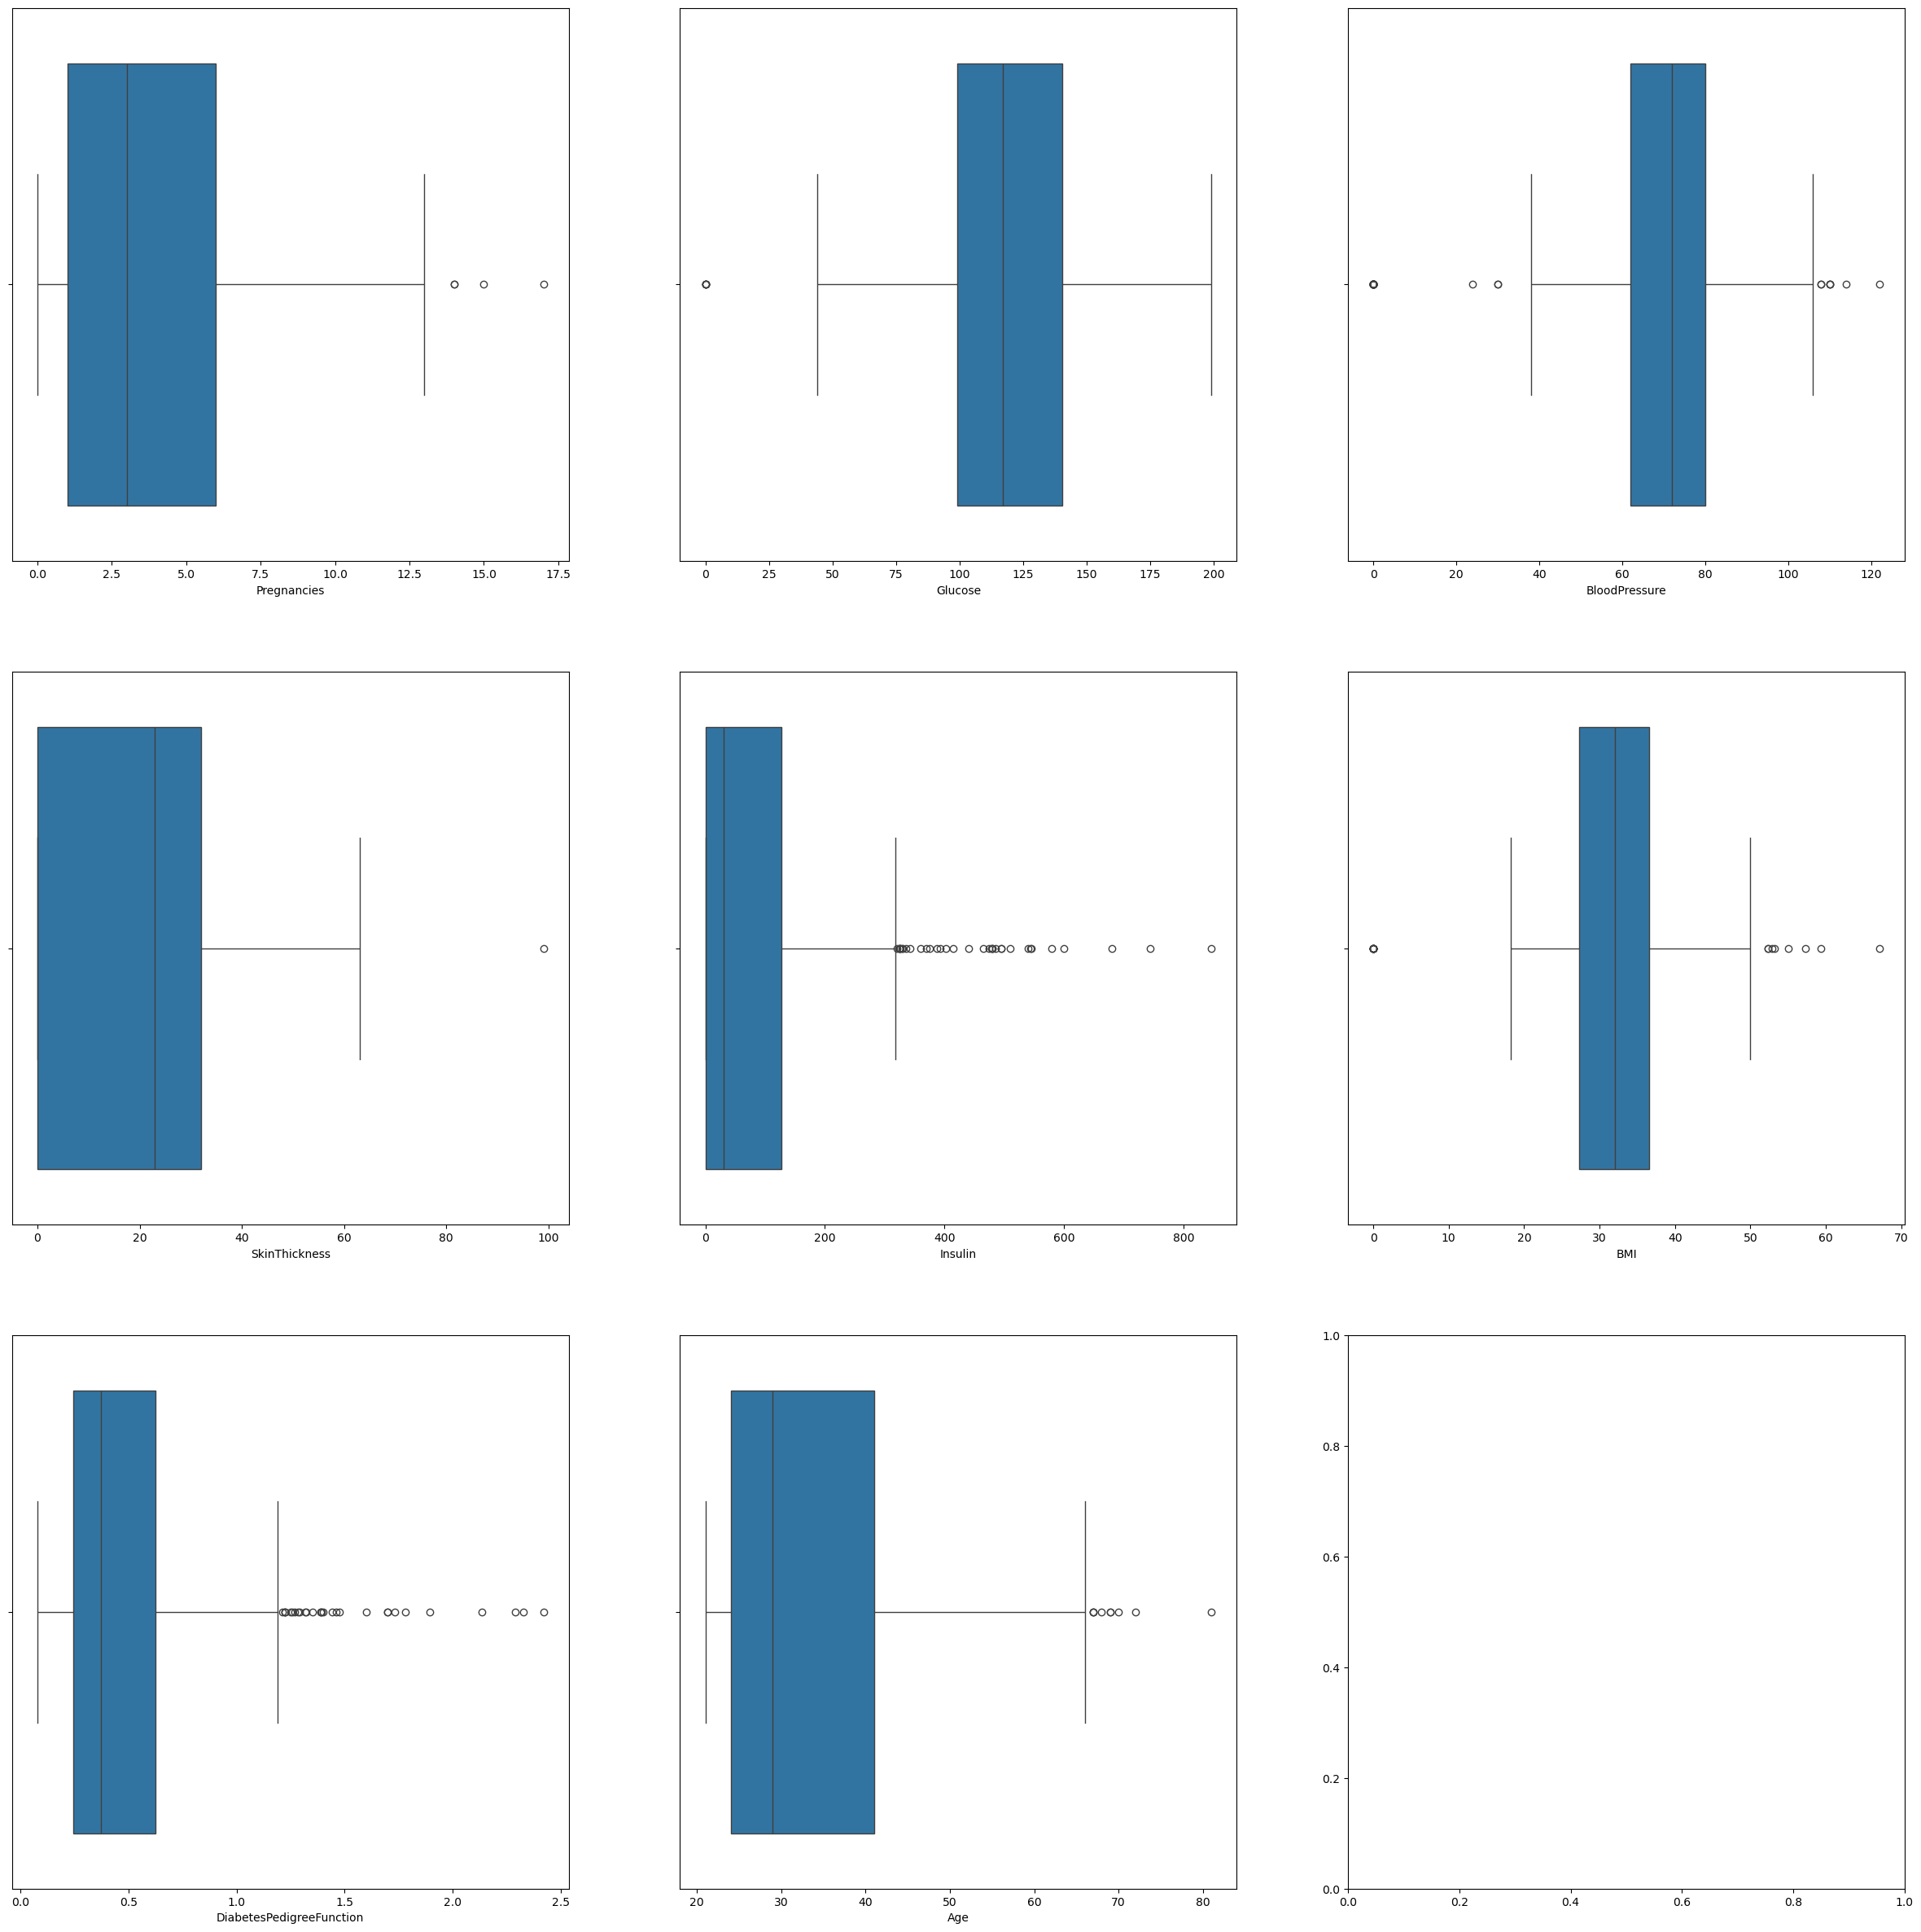

In [19]:
#checking for outliers

fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    if (i != "Outcome"):
        sns.boxplot(x=df[i], ax=axes[index])
        index= index+1
plt.show()

In [23]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
IQR

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [27]:
df= df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1) ]

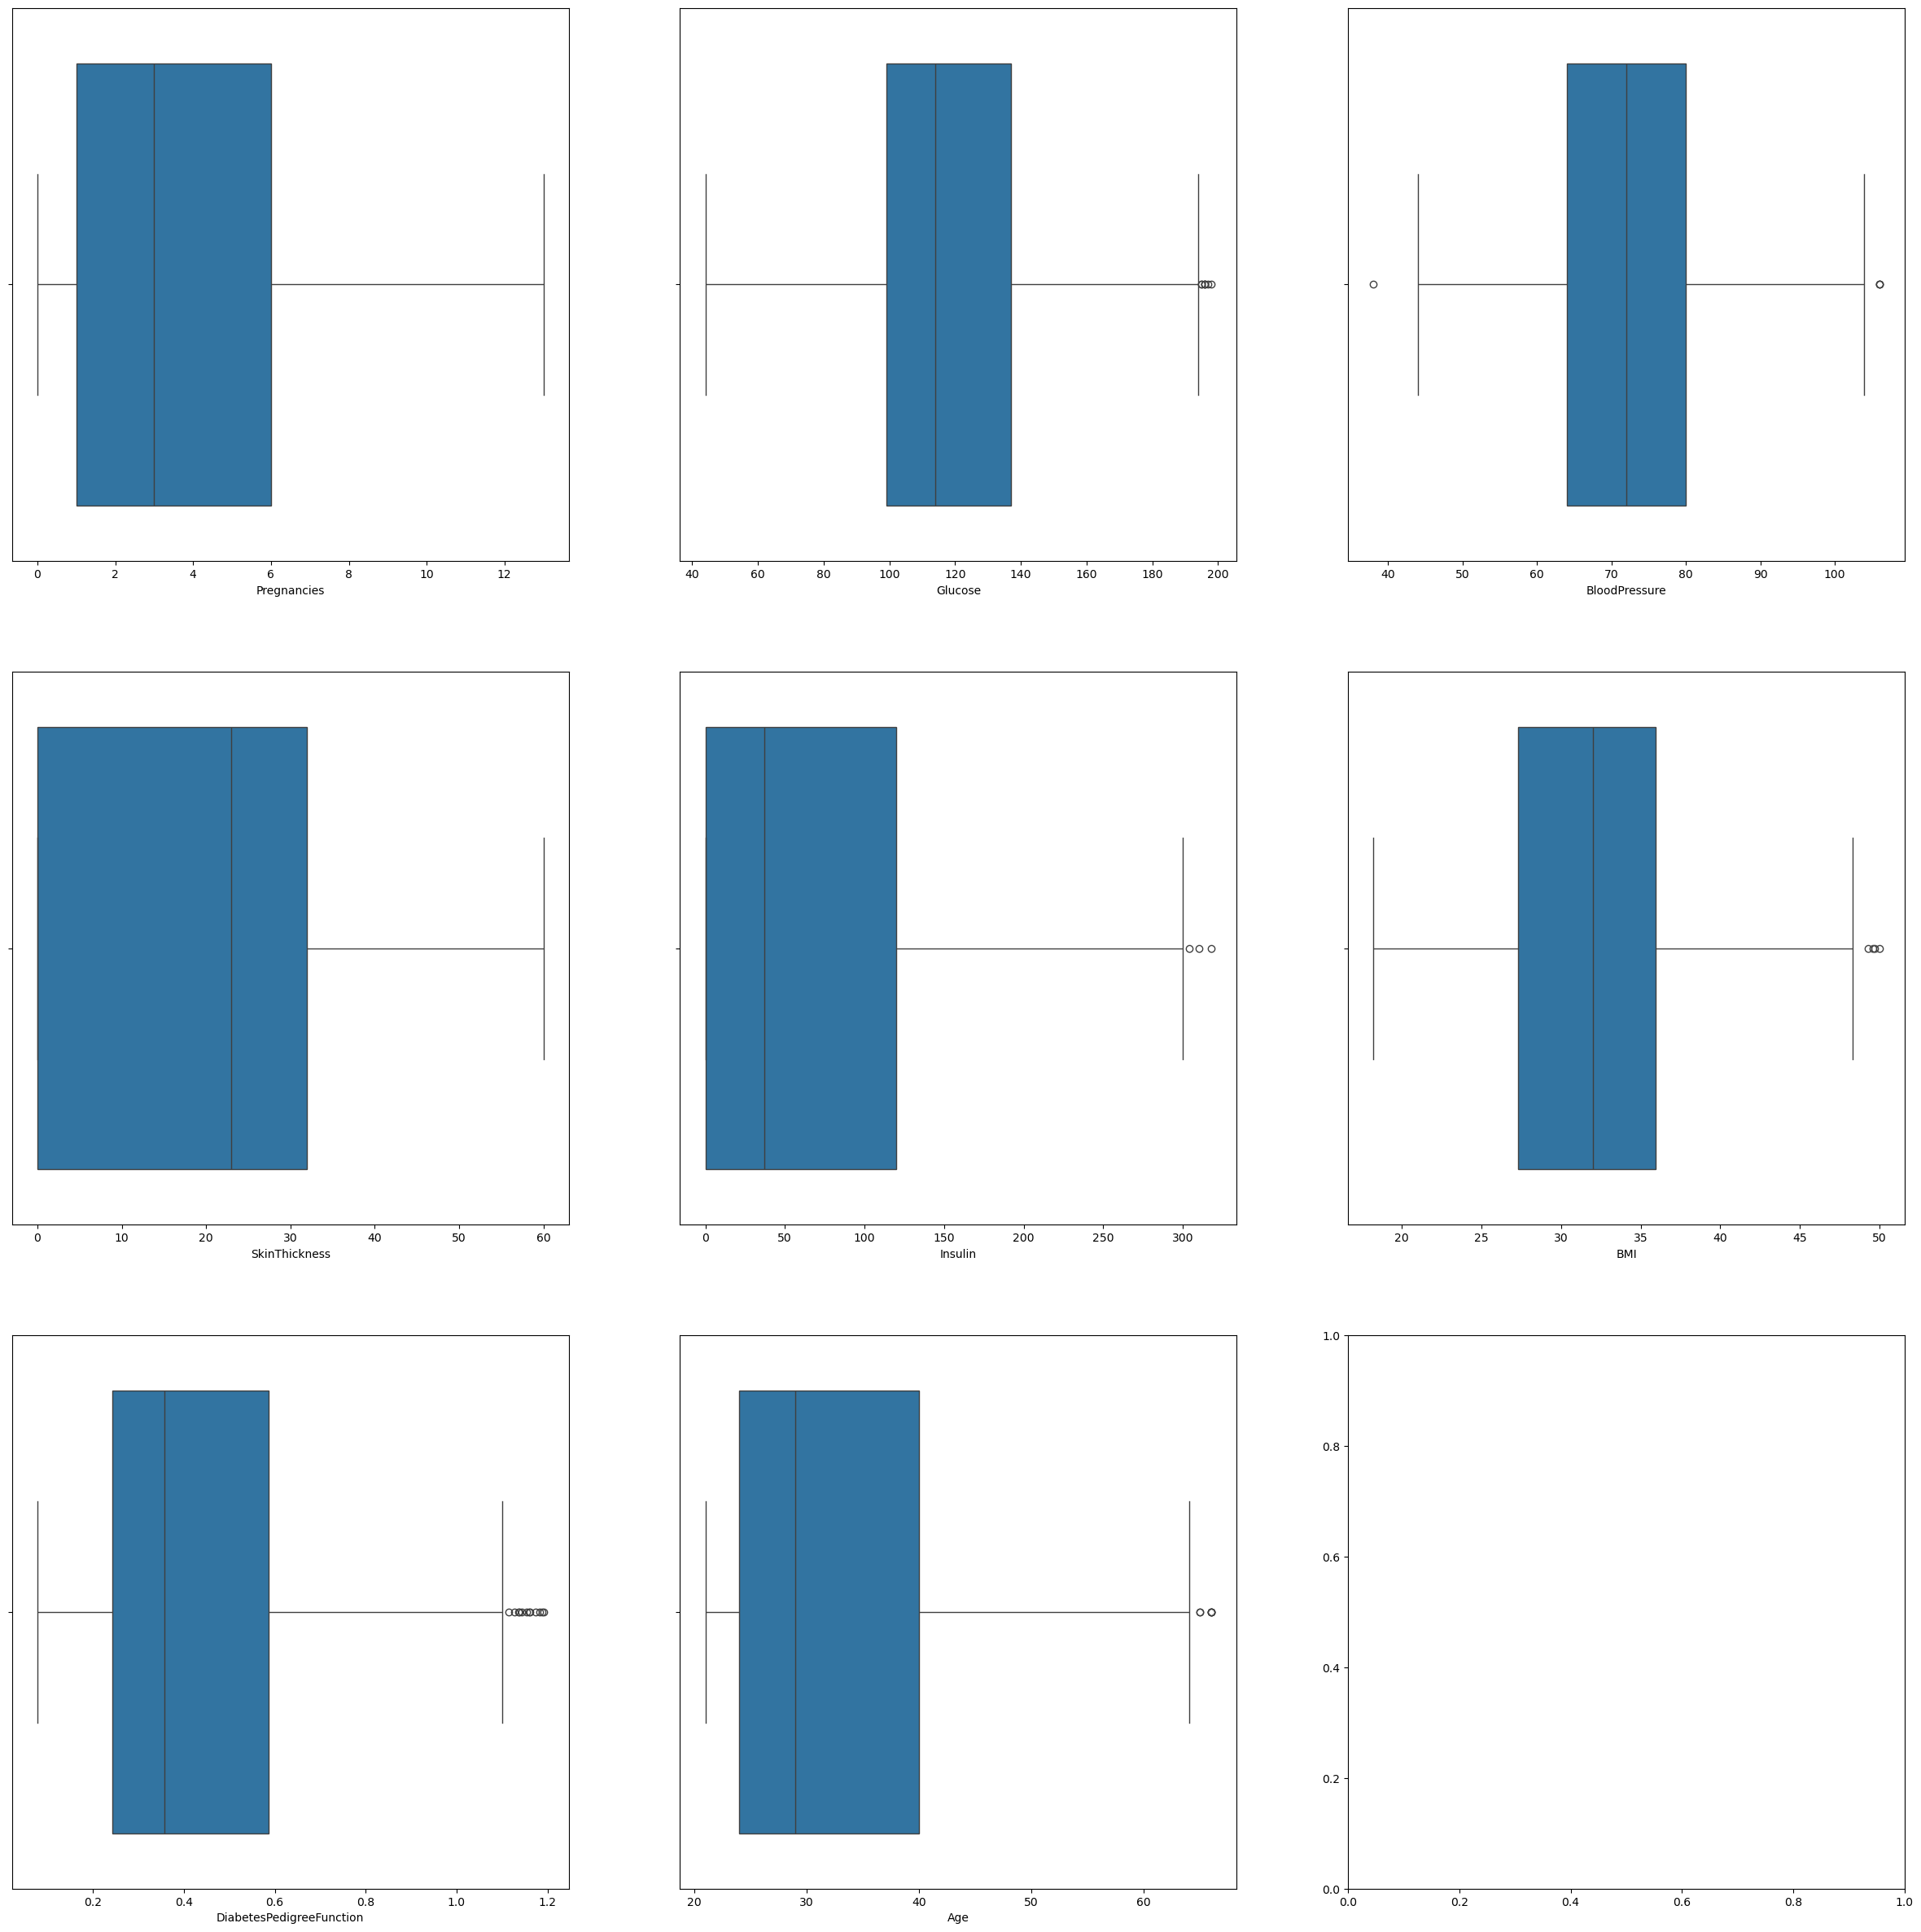

In [29]:
#checking for outliers

fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    if (i != "Outcome"):
        sns.boxplot(x=df[i], ax=axes[index])
        index= index+1
plt.show()

<Axes: >

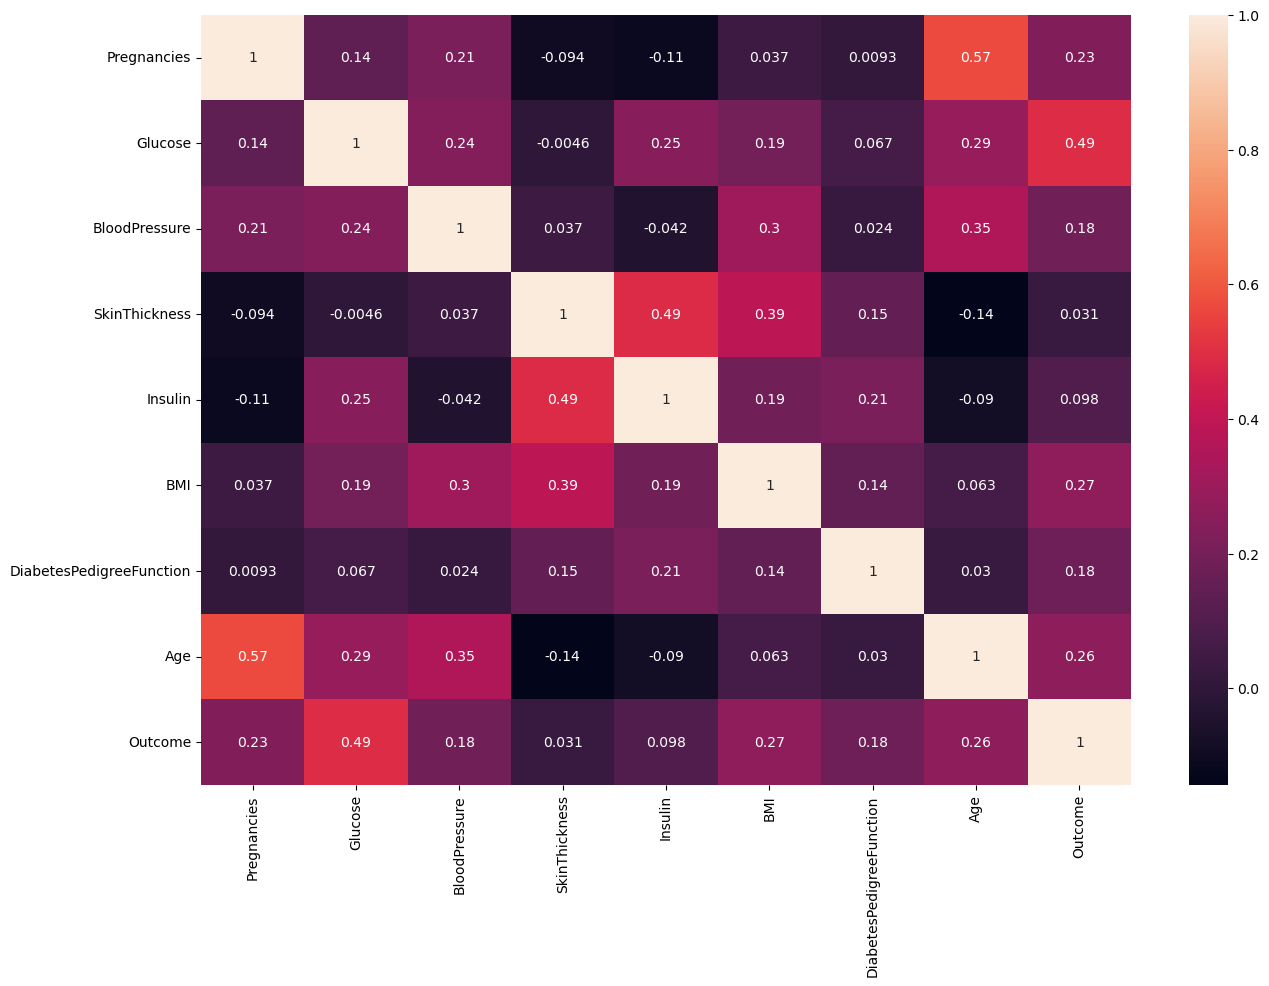

In [31]:
fig= plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

In [33]:
#checking for Multi-Collinearity
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,3.484846
1,Glucose,20.947945
2,BloodPressure,37.356434
3,SkinThickness,4.430741
4,Insulin,2.554788
5,BMI,30.960665
6,DiabetesPedigreeFunction,4.100191
7,Age,16.588756


In [35]:
df= df.reset_index(drop=True)

In [37]:
x= df.drop("Outcome", axis=1)
y= df["Outcome"]

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=11)

In [41]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

Final Naive Bayes Model 0

In [44]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb= GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [48]:
y_prd = gnb.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_prd))
cnf_matrix_0= confusion_matrix(y_test, y_prd)        # 0 Attributes are dropped 
print(cnf_matrix_0)

0.75
[[110  20]
 [ 28  34]]


Final Naive Bayes Model 1

In [53]:
df.drop("BloodPressure", axis=1, inplace=True)

In [55]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,3.477560
1,Glucose,18.481938
2,SkinThickness,4.423879
3,Insulin,2.498530
4,BMI,21.067019
5,DiabetesPedigreeFunction,4.079127
6,Age,14.504382


In [57]:
df.drop("BMI", axis=1, inplace=True)

In [59]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,3.465296
1,Glucose,12.118370
2,SkinThickness,3.350005
3,Insulin,2.421666
4,DiabetesPedigreeFunction,3.868394
5,Age,13.458238


In [61]:
df.drop("Age", axis=1, inplace=True)


In [63]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,2.442757
1,Glucose,5.849485
2,SkinThickness,3.338498
3,Insulin,2.368980
4,DiabetesPedigreeFunction,3.779250


In [65]:
df.head()

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome
0,6,148,35,0,0.627,1
1,1,85,29,0,0.351,0
2,8,183,0,0,0.672,1
3,1,89,23,94,0.167,0
4,5,116,0,0,0.201,0


In [69]:
X = df.drop("Outcome",axis=1)

In [71]:
y = df["Outcome"]

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=11)

In [77]:
scale= StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [79]:
gnb= GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [81]:
y_pred_full = gnb.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,y_pred_full)

0.7890625

In [85]:
print(confusion_matrix(y_test, y_pred_full))

[[79  8]
 [19 22]]
